In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('outer_space_objects.csv')
df = df[df['Entity']!='World']
df = df[df['Code'].isin(['RUS', 'USA'])]
df.sort_values('Year', inplace=True)
df.head(30)

,Entity,Code,Year,num_objects
766,Russia,RUS,1957,2
767,Russia,RUS,1958,1
1026,United States,USA,1958,7
768,Russia,RUS,1959,3
1027,United States,USA,1959,11
769,Russia,RUS,1960,3
1028,United States,USA,1960,17
1029,United States,USA,1961,31
770,Russia,RUS,1961,7
1030,United States,USA,1962,55


In [54]:
# Create a pivot table to reshape the data for stacked area chart
pivot_df = df.pivot(index='Year', columns='Code', values='num_objects')
pivot_df.dropna(inplace=True)

pivot_df_100 = pivot_df.divide(pivot_df.sum(axis=1), axis=0)

In [57]:
pivot_df.columns

Index(['RUS', 'USA'], dtype='object', name='Code')

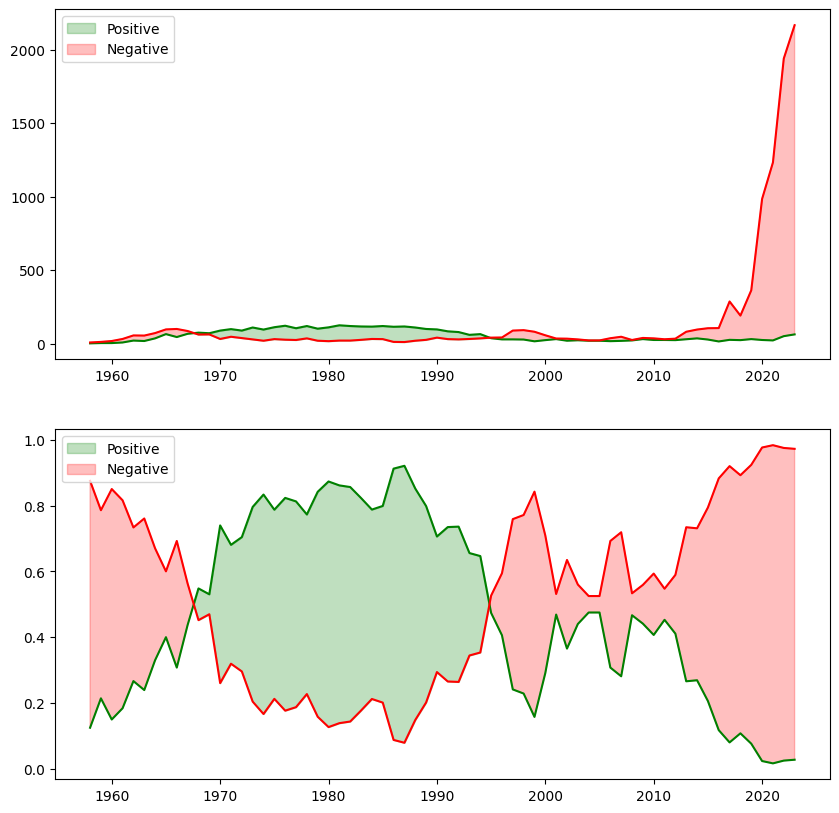

In [62]:
pivot_df

# Initialize figure and axis
fig, axs = plt.subplots(nrows=2, figsize=(10, 10))

# Plot lines
axs[0].plot(pivot_df.index, pivot_df['RUS'], color="green")
axs[0].plot(pivot_df.index, pivot_df['USA'], color="red")
axs[0].fill_between(
    pivot_df.index, pivot_df['RUS'], pivot_df['USA'], where=(pivot_df['RUS'] > pivot_df['USA']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Positive"
)
axs[0].fill_between(
    pivot_df.index, pivot_df['RUS'], pivot_df['USA'], where=(pivot_df['RUS'] <= pivot_df['USA']), 
    interpolate=True, color="red", alpha=0.25,
    label="Negative"
)
axs[0].legend()

# Plot lines
axs[1].plot(pivot_df_100.index, pivot_df_100['RUS'], color="green")
axs[1].plot(pivot_df_100.index, pivot_df_100['USA'], color="red")
axs[1].fill_between(
    pivot_df_100.index, pivot_df_100['RUS'], pivot_df_100['USA'], where=(pivot_df_100['RUS'] > pivot_df_100['USA']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Positive"
)
axs[1].fill_between(
    pivot_df_100.index, pivot_df_100['RUS'], pivot_df_100['USA'], where=(pivot_df_100['RUS'] <= pivot_df_100['USA']), 
    interpolate=True, color="red", alpha=0.25,
    label="Negative"
)
axs[1].legend(loc='upper left')

plt.show()

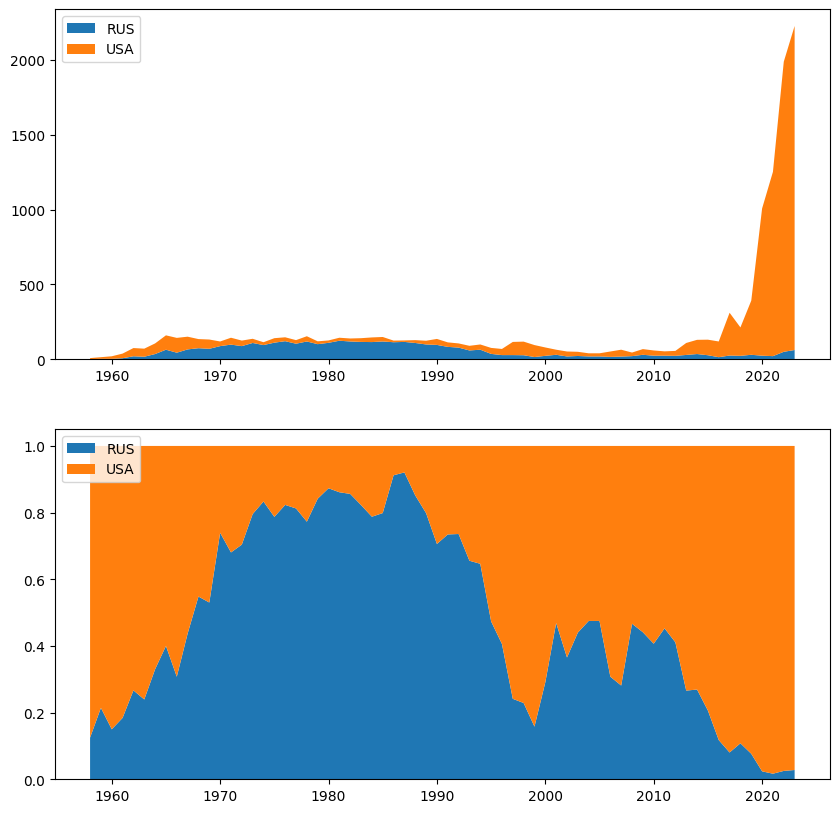

In [55]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 10))

axs[0].stackplot(pivot_df.index,
              pivot_df.values.T,
              labels=pivot_df.columns)
axs[0].legend(loc='upper left')

axs[1].stackplot(pivot_df_100.index,
              pivot_df_100.values.T,
              labels=pivot_df_100.columns)
axs[1].legend(loc='upper left')

plt.show()

In [26]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

# animation
from PIL import Image, ImageSequence
from matplotlib.animation import FuncAnimation

df = pd.read_csv('outer_space_objects.csv')
df = df[df['Entity']!='World']
df = df[df['Code'].isin(['RUS', 'USA'])]
df.sort_values('Year', inplace=True)

# pivot data
pivot_df = df.pivot(index='Year', columns='Code', values='num_objects')
pivot_df.dropna(inplace=True)
df.head()

,Entity,Code,Year,num_objects
766,Russia,RUS,1957,2
767,Russia,RUS,1958,1
1026,United States,USA,1958,7
768,Russia,RUS,1959,3
1027,United States,USA,1959,11


In [33]:
# increase resolution
plt.rcParams['figure.dpi'] = 120
plt.rcParams['savefig.dpi'] = 120

# Figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

def update(frame):
    
    # clear the previous stackplot
    ax.clear()
    
    # select subset of the dataframe up to the current frame
    subset_df = pivot_df.iloc[:frame]
    ax.stackplot(subset_df.index, subset_df.values.T, labels=subset_df.columns)
    ax.set_axis_off()
    return ax

# Creating the animation
ani = FuncAnimation(
    fig=fig,
    func=update,
    frames=len(pivot_df),
    interval=200, # in ms
    cache_frame_data=False
)
ani.save('stackplot_animation.gif', writer='imagemagick', fps=10)

In [32]:


with Image.open('stackplot_animation.gif') as img:
    frames = [frame.copy() for frame in ImageSequence.Iterator(img)]

# Define the initial frame duration and the increment (in milliseconds)
initial_duration = 100  # Starting duration of the first frame
increment = 10         # Increment duration for each subsequent frame

# Set the duration for each frame
for i, frame in enumerate(frames):
    frame_duration = initial_duration + i * increment
    frame.info['duration'] = frame_duration

# Save the modified frames as a new GIF
frames[0].save('progressively_longer_stackplot_animation.gif', save_all=True, append_images=frames[1:], loop=0)


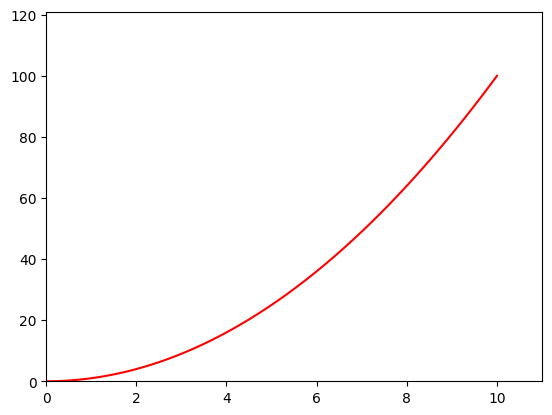

In [5]:


# Initial data
x_data = []
y_data = []

# Figure and axis
fig, ax = plt.subplots()
line, = ax.plot([], [], 'r-')  # Start with an empty plot

# Initialize the axes limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

def init():
    line.set_data([], [])
    return line,

def update(frame):
    # Append new data to our lists
    x_data.append(frame)
    y_data.append(frame ** 2)
    
    # Update the data of the line
    line.set_data(x_data, y_data)
    
    # Adjust axes if necessary
    ax.set_xlim(0, frame + 1)
    ax.set_ylim(0, (frame + 1) ** 2)
    
    return line,

# Creating the animation
ani = FuncAnimation(fig, update, frames=np.linspace(0, 10, 100),
                    init_func=init, blit=True, interval=100)

# Save the animation
ani.save('animation.gif', writer='imagemagick', fps=30)